[Home](index.ipynb) > [Data Collections](data_collections.ipynb) > Social Network Science

<img style='float: left;' src='https://www.gesis.org/fileadmin/styles/img/gs_home_logo_en.svg'>

### ``compsoc`` – *Notebooks for Computational Sociology* (alpha)

# Social Network Science (1916-2012): Collaboration and language use in a scholarly field
Authors: [Haiko Lietz](https://www.gesis.org/person/haiko.lietz)

Version: 0.91 (14.09.2020)

Please cite as: Lietz, Haiko (2020). Social Network Science (1916-2012): Collaboration and language use in a scholarly field. Version 0.91 (14.09.2020). *compsoc – Notebooks for Computational Sociology*. GESIS. url:[github.com/gesiscss/compsoc](https://github.com/gesiscss/compsoc)

<div class="alert alert-info">
<big><b>Significance</b></big>

Bla.
</div>

## Introduction
Bla.

Early case of behavioral data

Example for traces of behavior harnessed by digital technology, in this case: collected by the company Clarivate Analytics and stored in a bibliographic database.

Field delineated by Lietz (2020) for the purpose of... https://doi.org/10.1007/s11192-020-03527-0

Makes full use of the data model... "teaching example" for the mapping of quantifiable things like publications to transactions and authors, cited references or words to facts



**In this notebook**, bla.

## Dependencies and Settings

In [1]:
import compsoc as cs
import networkx as nx
import pandas as pd
#import warnings

In [2]:
#warnings.filterwarnings('ignore')

Data is at: https://doi.org/10.7802/1.1954

In [3]:
publications = pd.read_csv('data/sns/publications.txt', sep='\t', encoding='utf-8')
authors = pd.read_csv('data/sns/authors.txt', sep='\t', encoding='utf-8')
authorships = pd.read_csv('data/sns/authorships.txt', sep='\t', encoding='utf-8')
words = pd.read_csv('data/sns/words.txt', sep='\t', encoding='utf-8')
usages = pd.read_csv('data/sns/usages.txt', sep='\t', encoding='utf-8')
subfields = pd.read_csv('data/sns/subfields.txt', sep='\t', encoding='utf-8')

Dataset is already normalized

Tables with primary keys contain entities

Their relationships are specified in tables that merely consist of foreign keys.

|<img src='images/data_model_sns.png' style='float: none; width: 640px'>|
|:--|
|<em style='float: center'>**Figure 1**: Entity-relationship model for the Social Network Science dataset</em>|

Transactions as elementary pieces of communication

In [4]:
publications.head()

,publication_id,publication,time,type,subfield_id
0,0,HANIFAN_1916_A_130,1916,ARTICLE,0
1,1,YULE_1925_P_21,1925,ARTICLE,1
2,2,KERMACK_1927_P_700,1927,ARTICLE,1
3,3,ECKART_1936_P_211,1936,ARTICLE,2
4,4,COASE_1937_E_386,1937,ARTICLE,1


In this academic case, a possible translation of "transactions select facts" is that "publications are authored by authors". Authors are the senders of communications to an unspecified set of receivers.

The ``authors`` entity table is a mere list of which author has which identifier, where the identifier is an integer between $0$ and $N$. In case of an author network, $N$ is the number of nodes.

In [5]:
authors.head()

,author_id,author
0,0,"HANIFAN,_L_J"
1,1,"YULE,_G_U"
2,2,"KERMACK,_W_O"
3,3,"MCKENDRICK,_A_G"
4,4,"ECKART,_CARL"


The information which publication is actually authored by which author is stored in the ``authorships`` relationship table. The beauty of these tables is that they can directly be used as edge lists for network construction:

In [6]:
authorships.head()

,publication_id,author_id
0,0,0
1,1,1
2,2,2
3,2,3
4,3,4


In [7]:
authorships_2010 = authorships[authorships['publication_id'].isin(publications[publications['time'].between(2010, 2012)]['publication_id'])]

In [8]:
authorships_2010['weight'] = 1

<ipython-input-8-fd4cb8683980>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  authorships_2010['weight'] = 1


In [9]:
_, authors, co_authorships_2010, _ = cs.meaning_structures(
    selections=authorships_2010, 
    transaction_id='publication_id', 
    fact_id='author_id', 
    multiplex=True, 
    transactions=publications, 
    domain_id='subfield_id', 
    facts=authors
)

In [10]:
g = cs.construct_graph(
    directed=False, 
    multiplex=True, 
    graph_name='co_authorships_2010', 
    node_list=authors, 
    node_size='degree', 
    edge_list=co_authorships_2010[['author_id_from', 'author_id_to', 'weight', 'subfield_id']], 
    node_label='author'
)

In [11]:
#g = nx.convert_node_labels_to_integers(g)

In [12]:
g_lcc = g.subgraph(max(nx.connected_components(g), key=len))

In [13]:
vp_node_pos = nx.spring_layout(g_lcc)

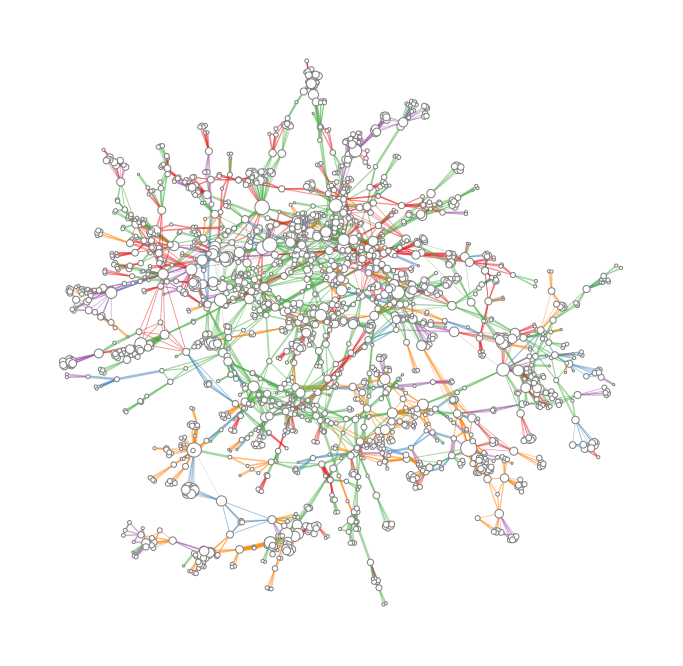

In [14]:
cs.draw_graph(
    g_lcc, 
    node_pos=vp_node_pos, 
    node_size_factor=5, 
    edge_width_factor=5, 
    edge_transparency=.5, 
    labels=None, 
    figsize='large'
)